In [4]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
wine=datasets.load_breast_cancer()
print(wine.keys())


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
#Exploring data
print(wine.feature_names)
print(wine.target)
x=wine.data
y=wine.target

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0

In [7]:
#Pandas DF
import pandas as pd
df =pd.DataFrame(x,columns=wine.feature_names)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


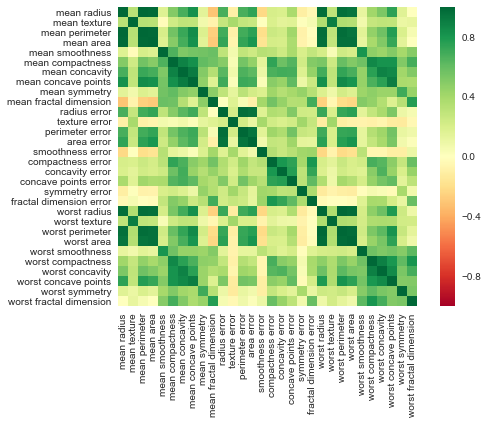

In [8]:
#Visual EDA
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

In [9]:
#Splitting data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
#The support gives the number of samples of the true response that lie in that class 



             precision    recall  f1-score   support

          0       0.94      0.95      0.94        63
          1       0.97      0.96      0.97       108

avg / total       0.96      0.96      0.96       171



In [10]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()
logreg.fit(x_train,y_train)
y_predict=logreg.predict(x_test)


In [11]:
#HYPER PARAMETER SETTING TO LOGISTIC REGRESSION
#logistic regression also has a regularization parameter: C controls the inverse of the regularization strength, and this is what you will tune in this exercise
from sklearn.model_selection import GridSearchCV
import numpy as np
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space }
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(x,y)
print(logreg_cv.best_params_ )
print(logreg_cv.best_score_ )

{'C': 100000000.0}
0.957820738137


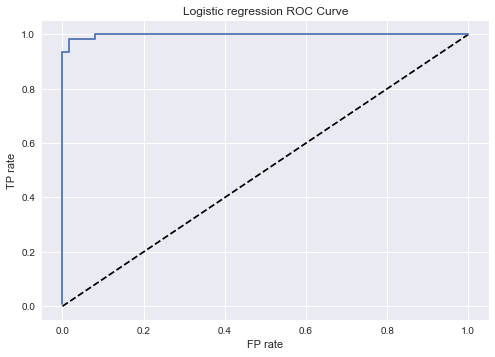

In [12]:
#ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_prop=logreg.predict_proba(x_test)[:,1] #Filter column of prob leaving target
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prop)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('Logistic regression ROC Curve')
plt.show()

In [13]:
#AUC of ROC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prop)



0.9977954144620812

In [14]:
#CV with ROC-AUC
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(logreg,x,y,cv=5,scoring='roc_auc')
print(cv_score)

[ 0.99450904  0.99192506  0.99731724  0.98256204  0.99664655]


In [15]:
#Hyper parameter tuning
#Choosing right parameters
#Grid search algo
from sklearn.model_selection import  GridSearchCV()
param_grid=

SyntaxError: invalid syntax (<ipython-input-15-99a7308a03ad>, line 4)

In [ ]:
#GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed 
#number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist, cv=5)

# Fit it to the data
tree_cv.fit(x,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [ ]:
#Regression with elastic net and tuning parameters
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio':l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net =  ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net,param_grid,cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))
